# Accelerated Toeplitz Matrix Multiplications

We want to effect a matrix multiplication of the form
$$
\begin{pmatrix}
0 \\
G_1 & 0 \\
G_2 & G_1 & 0 \\
G_3 & G_2 & G_1 & 0 \\
G_4 & G_3 & G_2 & G_1 & 0 \\
0   & G_4 & G_3 & G_2 & G_1 & 0 \\
0   & 0   & G_4 & G_3 & G_2 & G_1 & 0 \\
0   & 0   & 0   & G_4 & G_3 & G_2 & G_1 & 0
\end{pmatrix} \cdot 
\begin{pmatrix}
P_0 \\ P_1 \\ P_2 \\ \vdots \\ \\ \\ \vdots \\ P_{n-1}
\end{pmatrix} = 
\begin{pmatrix}
E_0^\text{far} \\ E_1^\text{far} \\ E_2^\text{far} \\ \vdots \\ \\ \\ \vdots \\ E_{n-1}^\text{far}
\end{pmatrix}
$$
where the [AIM scheme](https://www.google.com/search?q=adaptive+integral+method&ie=utf-8&oe=utf-8) constrains the $G_{ij} = G_{i-j}$ to a three-level Toeplitz structure (assuming a 3D system). The matrix multiplication proceeds "normally" in that $E_i = \sum_{j} G_{i-j} \cdot P_j$ but we can specifically accelerate $G_{i-j} \cdot P_j$ by exploiting the Toeplitz structure of the left operand.

In [42]:
from functools import reduce
import itertools
import matplotlib.pyplot as plt
import numpy as np
from operator import mul
from scipy.spatial.distance import pdist, squareform
%matplotlib inline

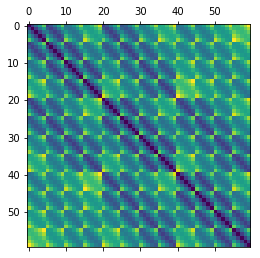

In [33]:
dimensions = [3, 4, 5]
pts = np.array(
    list(
        itertools.product(
            range(dimensions[0]),
            range(dimensions[1]),
            range(dimensions[2])
        )
    )
)

plt.matshow(squareform(pdist(pts)));

In [44]:
nx, ny = dimensions[:2]

def fourier_idx_pairs(row, col):
    src = (col // ny, col % ny)
    obs = (row // ny, row % ny)
    
    return (src, obs)

def fourier_idx(row, col):
    src, obs = fourier_idx_pairs(row, col)
    return ny * abs(obs[0] - src[0]) + abs(obs[1] - src[1])

[[ 0  1  2  3  4  5  6  7  8  9 10 11]
 [ 1  0  1  2  5  4  5  6  9  8  9 10]
 [ 2  1  0  1  6  5  4  5 10  9  8  9]
 [ 3  2  1  0  7  6  5  4 11 10  9  8]
 [ 4  5  6  7  0  1  2  3  4  5  6  7]
 [ 5  4  5  6  1  0  1  2  5  4  5  6]
 [ 6  5  4  5  2  1  0  1  6  5  4  5]
 [ 7  6  5  4  3  2  1  0  7  6  5  4]
 [ 8  9 10 11  4  5  6  7  0  1  2  3]
 [ 9  8  9 10  5  4  5  6  1  0  1  2]
 [10  9  8  9  6  5  4  5  2  1  0  1]
 [11 10  9  8  7  6  5  4  3  2  1  0]]


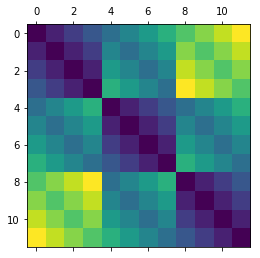

In [49]:
fourier_ids = np.array([
    [fourier_idx(r, c) for c in range(nx * ny)]
    for r in range(nx * ny)
])

print(fourier_ids)
plt.matshow(fourier_ids);